# Competitor Analysis

## Import Libraries + Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [18]:
store_df = pd.read_csv('store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
train_df = pd.read_csv('train.csv')
train_df.head()

/tmp/ipykernel_2891/1129658432.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Null values, Duplicates, Encoding

In [20]:
missing_values_store = store_df.isnull().mean().sort_values(ascending=False) * 100
print(missing_values_store.head(10))

PromoInterval                48.789238
Promo2SinceYear              48.789238
Promo2SinceWeek              48.789238
CompetitionOpenSinceYear     31.748879
CompetitionOpenSinceMonth    31.748879
CompetitionDistance           0.269058
StoreType                     0.000000
Store                         0.000000
Assortment                    0.000000
Promo2                        0.000000
dtype: float64


In [21]:
missing_values_train = train_df.isnull().mean().sort_values(ascending=False) * 100
print(missing_values_train.head(10))

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64


In [22]:
df = pd.merge(train_df, store_df, on='Store', how = 'left')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## Data Analysis

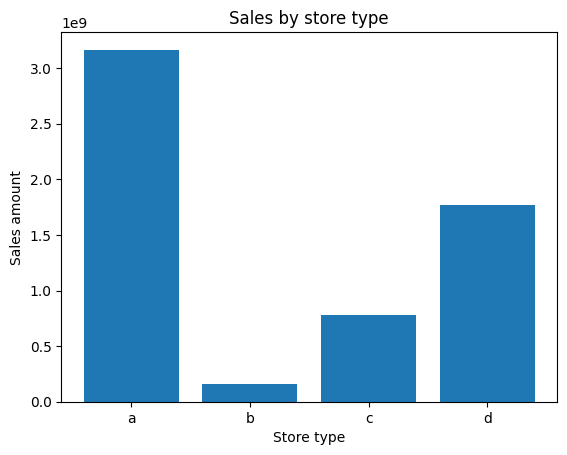

In [29]:
salesbystoretype = df.groupby("StoreType")['Sales'].sum()
plt.bar(salesbystoretype.index,salesbystoretype.values)
plt.xlabel("Store type")
plt.ylabel("Sales amount")
plt.title("Sales by store type")
plt.show()

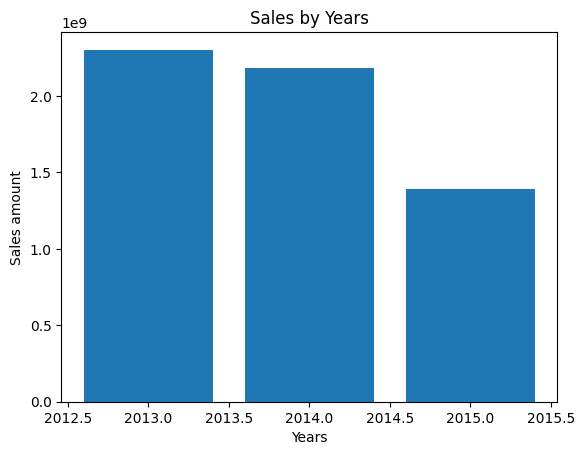

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

sales_by_year = df.groupby('Year')['Sales'].sum()
plt.bar(sales_by_year.index,sales_by_year.values)
plt.xlabel("Years")
plt.ylabel("Sales amount")
plt.title("Sales by Years")
plt.show()

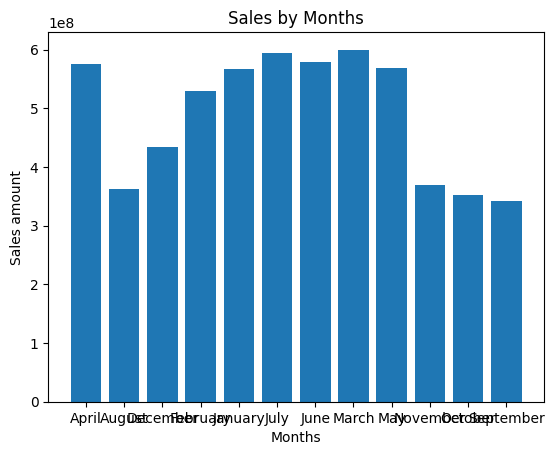

In [36]:
sales_by_month = df.groupby('Month')['Sales'].sum()
plt.bar(sales_by_month.index,sales_by_month.values)
plt.xlabel("Months")
plt.ylabel("Sales amount")
plt.title("Sales by Months")
plt.show()

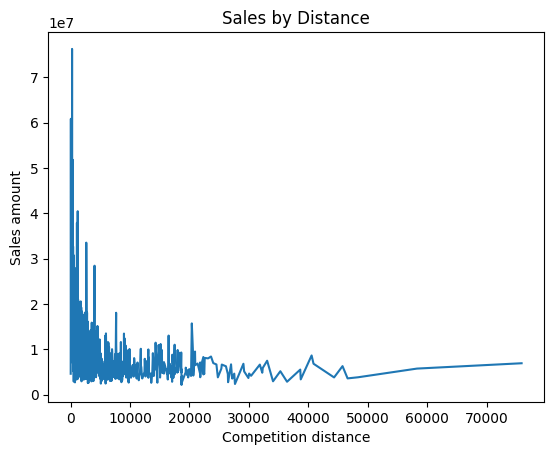

In [35]:
sales_by_competition_dis = df.groupby('CompetitionDistance')['Sales'].sum()
plt.plot(sales_by_competition_dis.index,sales_by_competition_dis.values)
plt.xlabel("Competition distance")
plt.ylabel("Sales amount")
plt.title("Sales by Distance")
plt.show()

In [39]:
df['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [42]:
df['StateHoliday'] = df['StateHoliday'].replace({"0": 0, "a": 1, "b": 1, "c": 1}).astype(int)

/tmp/ipykernel_2891/1051764152.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StateHoliday'] = df['StateHoliday'].replace({"0": 0, "a": 1, "b": 1, "c": 1}).astype(int)


In [43]:
df['SchoolHoliday'].value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

In [44]:
df['SchoolHoliday'] = df['SchoolHoliday'].astype(int)

df['Holiday'] = df['StateHoliday'] + df['SchoolHoliday']
df['Holiday'] = df['Holiday'].apply( lambda i : 1 if i > 0 else 0)
df['Holiday'].value_counts()

Holiday
0    819949
1    197260
Name: count, dtype: int64

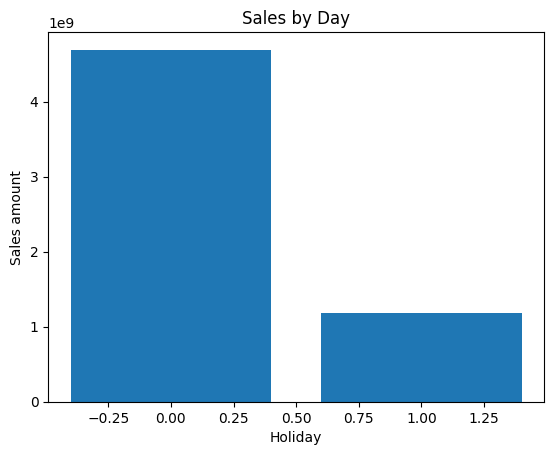

In [45]:
sales_by_holiday = df.groupby('Holiday')['Sales'].sum()
plt.bar(sales_by_holiday.index,sales_by_holiday.values)
plt.xlabel("Holiday")
plt.ylabel("Sales amount")
plt.title("Sales by Day")
plt.show()